# Importing the modules 

In [21]:
import pandas as pd         #it reduces time consumption and makes it simple
import numpy as np          #used for math operations of an array
import os                   #used to interactive with os
import seaborn as sns       #used for data analysis and visualization
import matplotlib.pyplot as plt    #to view the graph
import librosa               #used for audio signal visualization and feature extraction
import librosa.display       #used for to display audio files in diff formats like waveform and spectrogram
from IPython.display import Audio   #used to play audio
import warnings                     #to ignore warnings
warnings.filterwarnings('ignore') 

## Load the datasets


In [22]:
paths = []   #creating list path
labels = []   #creating list label
for dirname, _, filenames in os.walk('/kaggle/input'): #we are taking the input files from kaggle data set
    for filename in filenames:
        paths.append(os.path.join(dirname, filename)) #appending the filename to the path
        label = filename.split('_')[-1]   #splitting the file name with underscore
        label = label.split('.')[0]      #splitting the label with dot(.)
        labels.append(label.lower())     #moves the label to label list
print('Dataset is Loaded')            #splitting- it is used to focus only on sound which is required, used to give optimized output

Dataset is Loaded


In [23]:
paths[:5] #display the path

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [24]:
labels[:5]    #display the label

['fear', 'fear', 'fear', 'fear', 'fear']

In [25]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()    #to view the first'n' rows

speech label
0  /kaggle/input/toronto-emotional-speech-set-tes...  fear
1  /kaggle/input/toronto-emotional-speech-set-tes...  fear
2  /kaggle/input/toronto-emotional-speech-set-tes...  fear
3  /kaggle/input/toronto-emotional-speech-set-tes...  fear
4  /kaggle/input/toronto-emotional-speech-set-tes...  fear

In [26]:
df['label'].value_counts()   #to get the count of audio files in each emotion


fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

## DATA ANALYSIS

<AxesSubplot:xlabel='label', ylabel='count'>

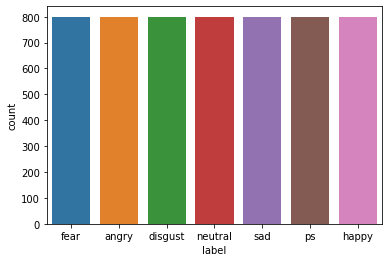

In [27]:
sns.countplot(df['label'])    #to Show the counts of observations in each categorical bin using bars


In [28]:
## functions to display waveform and spectogram
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))   #used to create a new figure.
    plt.title(emotion, size=20)  #used to display title in fig
    librosa.display.waveshow(data, sr=sr)    #used for to display audio files in waveform, sr=sampling rate(no of samples per sec of audio)
    plt.show() 
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data) #Short-time Fourier transform - computes the amplitude of freq for diff band over time
    xdb = librosa.amplitude_to_db(abs(x))  #Convert an amplitude spectrogram to dB-scaled spectrogram- to make the scal logarithmic
    plt.figure(figsize=(11,4))  
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()  #to visualization of the mapping from scalar values to colors

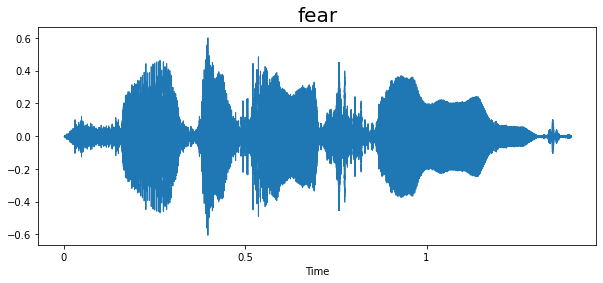

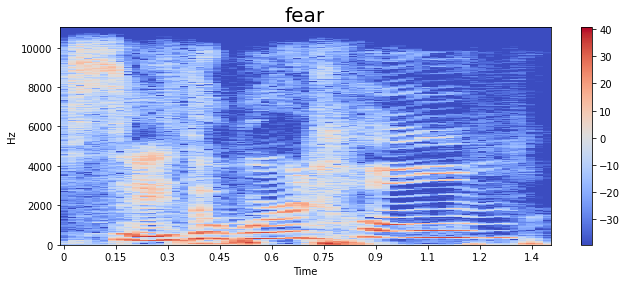

In [29]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)   #Load an audio file as a floating point time series. Audio will be automatically resampled to the given rate
waveplot(data, sampling_rate, emotion)  #to view in wave format
spectogram(data, sampling_rate, emotion)  #to view spectrogram format
Audio(path)  #for diplaying and playing audio file in output

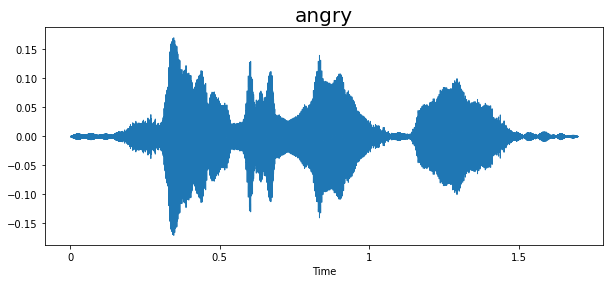

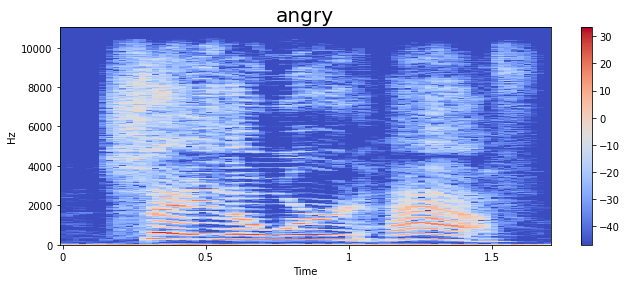

In [30]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

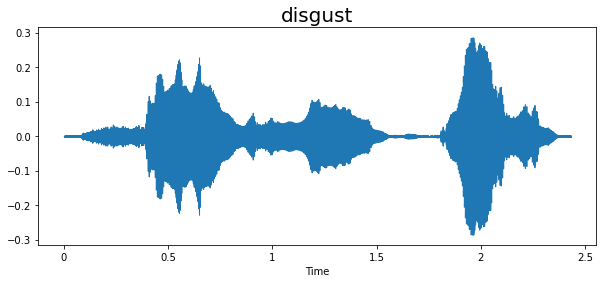

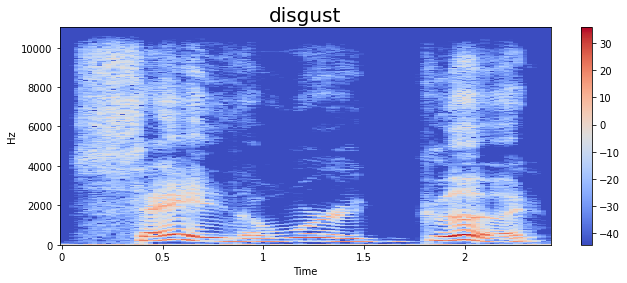

In [31]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

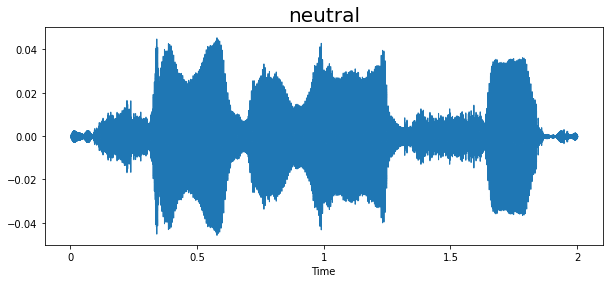

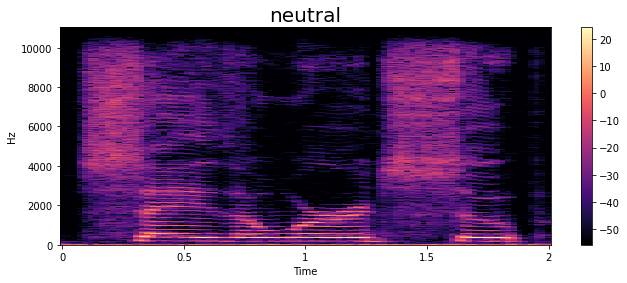

In [32]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

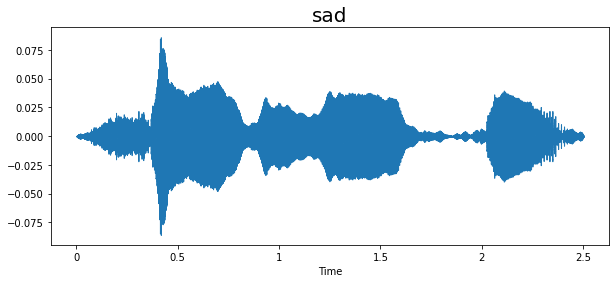

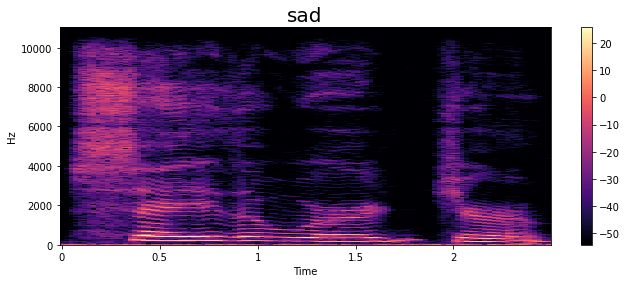

In [33]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

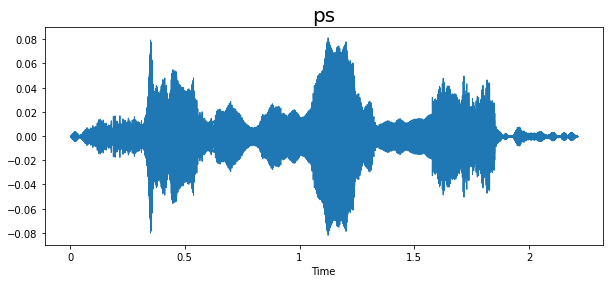

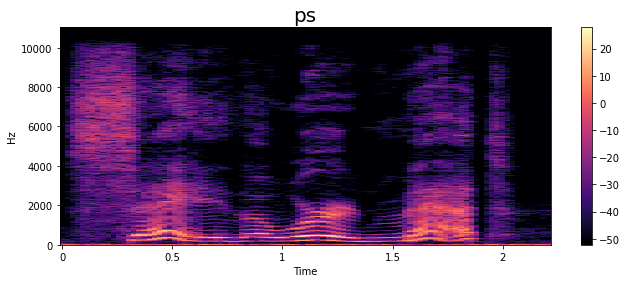

In [34]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

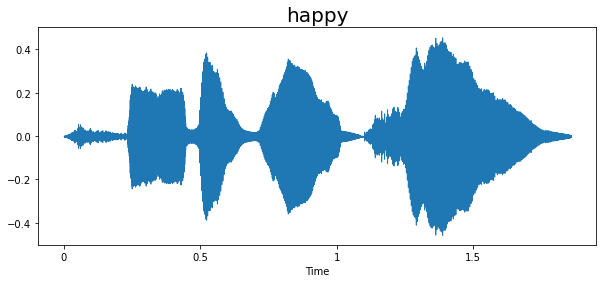

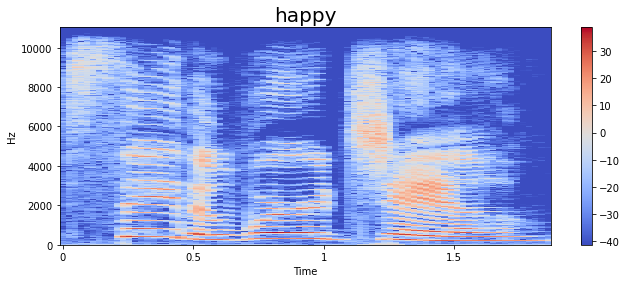

In [35]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## FEATURE EXTRACTION

In [36]:
def extract_mfcc(filename): #mel-freq ceptral coefficient- used for to envelop the shape of speech signal
    y, sr = librosa.load(filename, duration=3, offset=0.5) #duration of feature extraction is 3, offset is 0.5(it is baised value used during model training)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0) #If multi-channel audio inputs are provided, the MFCC calculation will depend on the peak loudness across all channels.
    return mfcc

In [37]:
extract_mfcc(df['speech'][0]) #extracts feature of first data in file array


array([-287.13037  ,   87.756935 ,   -4.139178 ,   24.081968 ,
        -16.696726 ,   12.9706335,   10.522443 ,   -1.1463207,
         -0.7333776,   12.855535 ,  -19.147291 ,   -6.418062 ,
          4.9657674,   -2.6571147,  -10.655446 ,    4.9578824,
        -14.555861 ,   15.37587  ,   18.444933 ,   23.878317 ,
         31.495148 ,   17.326372 ,   -4.764838 ,    1.7432449,
        -12.009848 ,    7.34574  ,   -3.205127 ,   -7.1714525,
        -11.410635 ,   -2.0019934,   -5.6109643,    4.532194 ,
        -11.396626 ,   -8.892363 ,   -3.7391381,    4.8819685,
         -1.5599906,    2.4654472,   11.599151 ,   11.042193 ],
      dtype=float32)

In [39]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x)) #lambda- func which does not have a name


In [40]:
X_mfcc  #apply the feature extraction to all emotion


0       [-287.13037, 87.756935, -4.139178, 24.081968, ...
1       [-350.0836, 37.654167, -6.292855, 17.096148, 4...
2       [-341.78152, 56.15365, -16.617884, 23.219698, ...
3       [-309.17456, 24.854897, -8.001089, 10.065497, ...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
5595    [-376.5839, 63.959797, -3.0598662, 11.498796, ...
5596    [-316.5801, 43.546066, -9.336959, -0.19844404,...
5597    [-359.7638, 81.01536, -18.355762, 5.30123, -25...
5598    [-354.38315, 103.432144, -15.916283, -10.30884...
5599    [-391.15958, 56.44471, -1.0464002, 0.95874214,...
Name: speech, Length: 5600, dtype: object

In [41]:
#To convert the data to the 3D array format used by the LSTM model
#LSTM- long short-term memory - to classify, process and make predictions based on time series data
X = [x for x in X_mfcc] 
X = np.array(X)
X.shape

(5600, 40)

In [42]:
## input split
X = np.expand_dims(X, -1) #Expand the shape of an array
X.shape

(5600, 40, 1)

In [43]:
from sklearn.preprocessing import OneHotEncoder #to change raw feature vectors into a representation
enc = OneHotEncoder() # Encode categorical integer features using a one-hot
y = enc.fit_transform(df[['label']])  #can be used to normalize labels

In [44]:
y = y.toarray() #used to return an array containing all the elements in ArrayList in the correct order

In [45]:
y.shape

(5600, 7)

## Create the LSTM model

In [46]:
#keras used for distributed training of deep learning models
from keras.models import Sequential #arranging the Keras layers in a sequential order 
from keras.layers import Dense, LSTM, Dropout #used for reducing overfitting and improving model performance

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'), #Rectified Linear Unit activation function - gives ouput as input if it is positive or else zero
                                  #f(x) = max(0,x)
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  #used to multi-class classification problems where class membership is required on more than two class labels
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #for compiling
model.summary()   #viewing the model

2022-12-05 15:24:39.141762: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
____________________________________________________

In [47]:
# Train the model #provides fit statistics calculated across all of the models
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

2022-12-05 15:25:25.525317: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
9/9 [==============================] - 5s 324ms/step - loss: 1.8358 - accuracy: 0.2962 - val_loss: 1.9529 - val_accuracy: 0.0973
Epoch 2/100
9/9 [==============================] - 2s 251ms/step - loss: 1.5319 - accuracy: 0.5344 - val_loss: 1.9915 - val_accuracy: 0.1375
Epoch 3/100
9/9 [==============================] - 2s 236ms/step - loss: 1.1198 - accuracy: 0.6500 - val_loss: 1.8003 - val_accuracy: 0.1223
Epoch 4/100
9/9 [==============================] - 2s 233ms/step - loss: 0.8160 - accuracy: 0.7134 - val_loss: 1.4670 - val_accuracy: 0.2348
Epoch 5/100
9/9 [==============================] - 2s 248ms/step - loss: 0.6343 - accuracy: 0.7605 - val_loss: 1.1167 - val_accuracy: 0.5393
Epoch 6/100
9/9 [==============================] - 2s 253ms/step - loss: 0.5043 - accuracy: 0.8118 - val_loss: 0.7617 - val_accuracy: 0.7071
Epoch 7/100
9/9 [==============================] - 2s 232ms/step - loss: 0.3860 - accuracy: 0.8594 - val_loss: 0.5628 - val_accuracy: 0.7964
Epoch 8/100
9

## result plotting

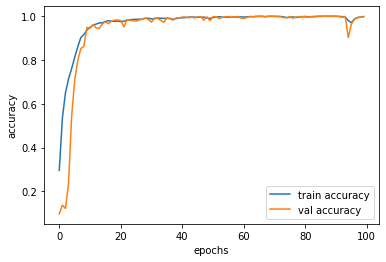

In [48]:
epochs = list(range(100)) #total no. of interations of all training data in one cycle
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() #it automatically creates an area on the graph which describes all the elements of a graph
plt.show()

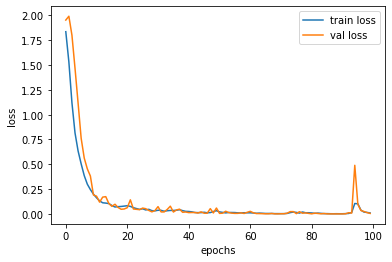

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()